MODELO DE RECOMENDACION EN BASE A BDD DE LIBROS  ISBN


MODELO DE APRENDIZAJE NO SUPERVISADO NLP **texto en negrita**

Probando con: {'ngram_range': (1, 1), 'max_df': 1.0, 'min_df': 1}
Probando con: {'ngram_range': (1, 2), 'max_df': 1.0, 'min_df': 1}
Probando con: {'ngram_range': (1, 3), 'max_df': 1.0, 'min_df': 1}
Probando con: {'ngram_range': (1, 1), 'max_df': 0.8, 'min_df': 2}
Probando con: {'ngram_range': (1, 2), 'max_df': 0.8, 'min_df': 2}
Probando con: {'ngram_range': (1, 1), 'max_df': 0.6, 'min_df': 3}
Probando con: {'ngram_range': (1, 1), 'max_df': 0.6, 'min_df': 2}
Probando con: {'ngram_range': (1, 2), 'max_df': 0.6, 'min_df': 3}
Probando con: {'ngram_range': (1, 1), 'max_df': 0.7, 'min_df': 3}
Probando con: {'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 3}
Probando con: {'ngram_range': (1, 3), 'max_df': 0.8, 'min_df': 3}
Probando con: {'ngram_range': (1, 4), 'max_df': 0.8, 'min_df': 4}
Probando con: {'ngram_range': (1, 5), 'max_df': 0.9, 'min_df': 4}

--- Resultados de la experimentación ---
Parámetros: {'ngram_range': (1, 1), 'max_df': 1.0, 'min_df': 1} | Puntuación total: 10.60
Parámetros

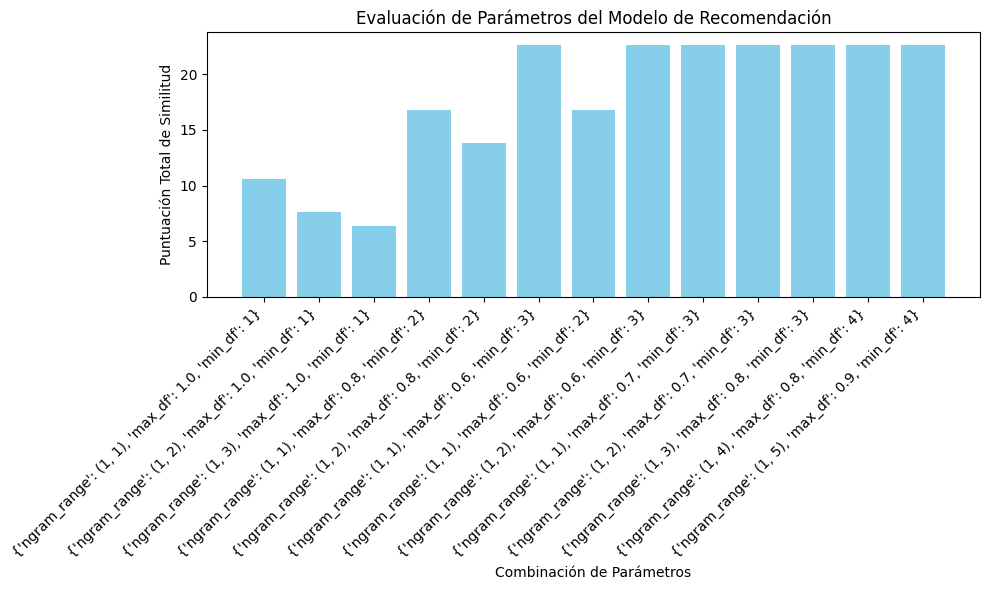


La mejor combinación de parámetros es la que tiene la puntuación más alta en el gráfico.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Datos de ejemplo ---
# Este es el conjunto de datos que ya tienes.
data = {'title': ['The Lord of the Rings', 'The Hobbit', 'The Silmarillion', 'The Chronicles of Narnia', 'A Song of Ice and Fire', 'The Two Towers', 'The Return of the King', 'The Lion, the Witch and the Wardrobe', 'Prince Caspian', 'Game of Thrones'],
        'description': ['A high fantasy novel.', 'A children\'s fantasy novel.', 'A mythological history book.', 'A series of fantasy novels.', 'A series of epic fantasy novels.', 'Second part of The Lord of the Rings.', 'Third part of The Lord of the Rings.', 'The first novel in The Chronicles of Narnia.', 'The second novel in The Chronicles of Narnia.', 'The first novel of A Song of Ice and Fire.'],
        'author': ['J.R.R. Tolkien', 'J.R.R. Tolkien', 'J.R.R. Tolkien', 'C.S. Lewis', 'George R.R. Martin', 'J.R.R. Tolkien', 'J.R.R. Tolkien', 'C.S. Lewis', 'C.S. Lewis', 'George R.R. Martin']}
df = pd.DataFrame(data)

# --- 2. Parámetros a probar ---
# Aquí puedes agregar o quitar combinaciones que quieras probar
parametros_a_probar = [
    {'ngram_range': (1, 1), 'max_df': 1.0, 'min_df': 1},
    {'ngram_range': (1, 2), 'max_df': 1.0, 'min_df': 1},
    {'ngram_range': (1, 3), 'max_df': 1.0, 'min_df': 1},
    {'ngram_range': (1, 1), 'max_df': 0.8, 'min_df': 2},
    {'ngram_range': (1, 2), 'max_df': 0.8, 'min_df': 2},
    {'ngram_range': (1, 1), 'max_df': 0.5, 'min_df': 3},
]

# --- 3. Bucle de experimentación ---
resultados = []

for params in parametros_a_probar:
    print(f"Probando con: {params}")

    # Calcular la matriz TF-IDF con los parámetros actuales
    tfidf = TfidfVectorizer(stop_words='english', **params)
    tfidf_matrix = tfidf.fit_transform(df['description'])

    # Calcular la similitud del coseno
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Evaluación simple: Suma de las 5 mejores puntuaciones de similitud para cada libro
    # Se ignora la similitud con el propio libro (que siempre es 1.0)
    evaluacion_total = 0
    for i in range(len(df)):
        sim_scores = sorted(list(enumerate(cosine_sim[i])), key=lambda x: x[1], reverse=True)[1:6]
        sum_scores = sum([score for _, score in sim_scores])
        evaluacion_total += sum_scores

    resultados.append({'params': params, 'score': evaluacion_total})

print("\n--- Resultados de la experimentación ---")
for res in resultados:
    print(f"Parámetros: {res['params']} | Puntuación total: {res['score']:.2f}")

# --- 4. Visualizar los resultados ---
labels = [str(p['params']) for p in resultados]
scores = [res['score'] for res in resultados]

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color='skyblue')
plt.xlabel('Combinación de Parámetros')
plt.ylabel('Puntuación Total de Similitud')
plt.title('Evaluación de Parámetros del Modelo de Recomendación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nLa mejor combinación de parámetros es la que tiene la puntuación más alta en el gráfico.")

